# Full Dataset PCA

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn import preprocessing
import pandas as pd

In [2]:
# Import the dataset
df = pd.read_csv("../data/processed/Full_clean.csv")

In [3]:
# Create data without meta
no_meta = df.drop(["Country Code","Year","Unnamed: 0"],axis="columns")

In [4]:
# Split data into tourist and non-tourist data
tourist_vars = ['ST.INT.ARVL', 'ST.INT.XPND.MP.ZS', 'ST.INT.XPND.CD',
       'ST.INT.DPRT', 'ST.INT.RCPT.XP.ZS', 'ST.INT.RCPT.CD',
       'Tourist Defecit', 'Tourism Net', 'Tourist Avg Net',
       'Population Estimate', 'ST.INT.ARVL.PER.CAPITA',
       'ST.INT.DPRT.PER.CAPITA']
factors = no_meta.drop(tourist_vars, axis="columns")
targets = no_meta[tourist_vars]

## Imputation

In [5]:
# Impute the missing values
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imputed = imp.fit_transform(factors.values)

## Scaling

In [6]:
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(imputed)

## Component Count Selection

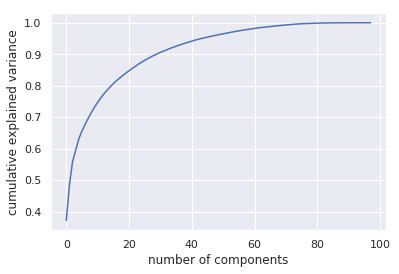

In [7]:
pca = PCA().fit(data.data)
explained = np.cumsum(pca.explained_variance_ratio_)
plt.plot(explained)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [8]:
# Iterate through explained variance until .99 is acheived
for components in range(len(explained)-1):
    if explained[components] >= .99:
        print("{} is the optimal number of components".format(components+1))
        break

68 is the optimal number of components


## PCA Transformation

In [9]:
pca = PCA(n_components=68)
reduced = pca.fit_transform(data.data)

In [10]:
reduced.dump("../data/processed/pca.pickle")